In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("heart_failure_prediction.csv")
df.head(100000)

,Age,Gender,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,Slope,Num_Major_Vessels,Thalassemia,Diabetes,Smoking_History,Alcohol_Consumption,Physical_Activity_Level,Family_History,BMI,Heart_Failure
0,69,Male,Atypical,106,250,1,ST-T Wave Abnormality,171,0,0.92,Flat,2,Normal,1,Former,Heavy,Low,0,36.92,1
1,32,Male,Non-anginal,124,396,1,Left Ventricular Hypertrophy,73,0,0.92,Downsloping,2,Reversible Defect,1,Current,NaN,Low,0,36.92,1
2,89,Female,Non-anginal,164,256,1,Left Ventricular Hypertrophy,157,0,0.92,Upsloping,1,Fixed Defect,1,Former,NaN,Low,0,36.92,0
3,78,Female,Typical,116,297,1,Normal,163,1,0.92,Flat,1,Reversible Defect,1,Former,Heavy,Low,1,36.92,0
4,38,Male,Non-anginal,88,386,1,ST-T Wave Abnormality,123,1,0.92,Upsloping,3,Fixed Defect,0,Never,Moderate,Low,1,36.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49,Female,Asymptomatic,103,280,1,Normal,150,0,0.92,Downsloping,1,Fixed Defect,1,Former,NaN,Moderate,1,36.92,0
9996,39,Male,Atypical,162,249,0,Left Ventricular Hypertrophy,120,0,0.92,Downsloping,3,Normal,1,Never,Heavy,High,0,36.92,1
9997,72,Male,Non-anginal,139,181,0,Left Ventricular Hypertrophy,153,1,0.92,Downsloping,3,Normal,1,Former,Heavy,Moderate,0,36.92,0
9998,74,Male,Non-anginal,172,109,0,Normal,191,0,0.92,Upsloping,3,Normal,0,Never,NaN,Low,1,36.92,0


In [41]:
df = df[df["Heart_Failure"] == 1]
df.head(100000)

,Age,Gender,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Oldpeak,Slope,Num_Major_Vessels,Thalassemia,Diabetes,Smoking_History,Alcohol_Consumption,Physical_Activity_Level,Family_History,BMI,Heart_Failure
0,69,Male,Atypical,106,250,1,ST-T Wave Abnormality,171,0,0.92,Flat,2,Normal,1,Former,Heavy,Low,0,36.92,1
1,32,Male,Non-anginal,124,396,1,Left Ventricular Hypertrophy,73,0,0.92,Downsloping,2,Reversible Defect,1,Current,NaN,Low,0,36.92,1
4,38,Male,Non-anginal,88,386,1,ST-T Wave Abnormality,123,1,0.92,Upsloping,3,Fixed Defect,0,Never,Moderate,Low,1,36.92,1
7,41,Male,Atypical,185,231,1,Normal,83,1,0.92,Upsloping,2,Reversible Defect,1,Former,Heavy,Moderate,1,36.92,1
9,39,Male,Atypical,195,325,1,Normal,77,0,0.92,Downsloping,2,Normal,1,Former,NaN,Low,0,36.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,32,Male,Non-anginal,170,397,0,Normal,62,1,0.92,Flat,2,Reversible Defect,1,Current,NaN,High,0,36.92,1
9986,65,Male,Asymptomatic,199,318,1,ST-T Wave Abnormality,68,0,0.92,Flat,0,Reversible Defect,0,Current,NaN,Low,0,36.92,1
9989,60,Female,Asymptomatic,190,356,0,Normal,115,0,0.92,Downsloping,2,Fixed Defect,1,Never,NaN,High,0,36.92,1
9993,34,Male,Asymptomatic,173,276,0,Normal,119,0,0.92,Downsloping,1,Fixed Defect,1,Former,Moderate,High,0,36.92,1


In [42]:
age_bins = [0, 30, 60, 120]
age_labels = ['0-29', '30-59', '60-90+',]
df['Age_Group_30'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

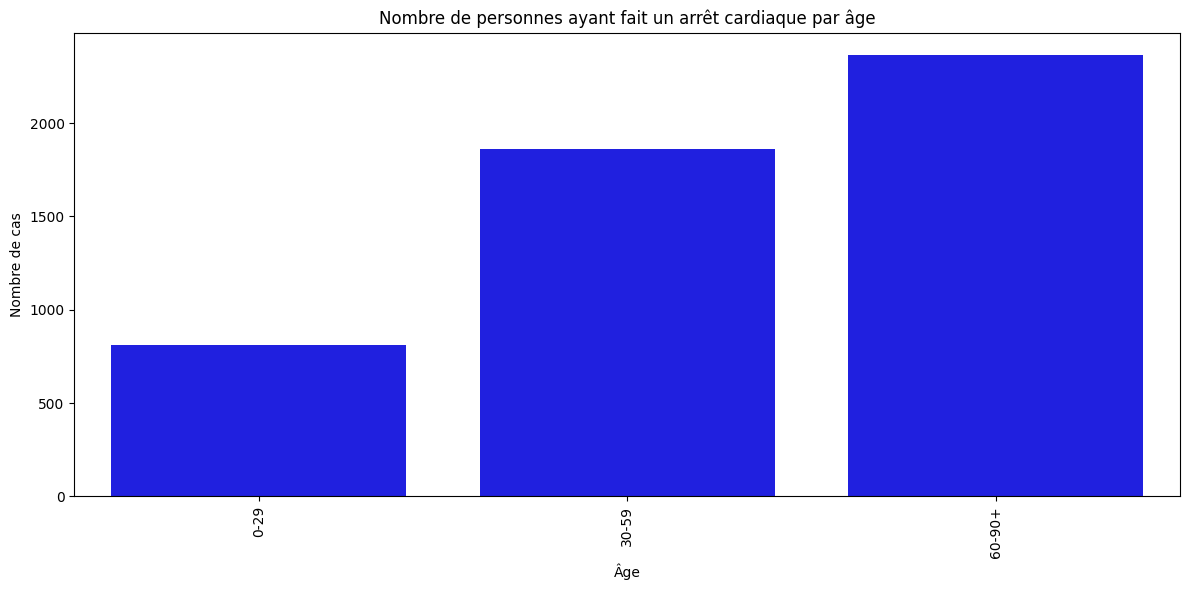

In [43]:
age_counts = df['Age_Group_30'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, color='blue')
plt.title("Nombre de personnes ayant fait un arrêt cardiaque par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

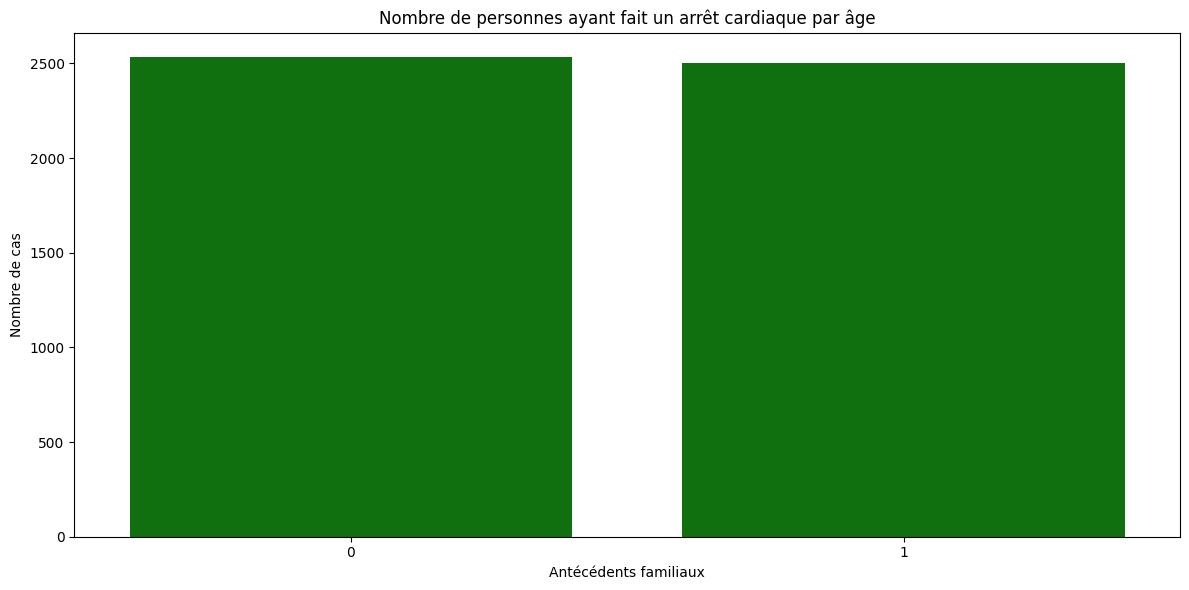

In [44]:
family_history_count = df['Family_History'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=family_history_count.index, y=family_history_count.values, color='green')
plt.title("Nombre de personnes ayant fait un arrêt cardiaque par âge")
plt.xlabel("Antécédents familiaux")
plt.ylabel("Nombre de cas")
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain_Type', 'Resting_BP', 'Cholesterol',
       'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'Oldpeak', 'Slope', 'Num_Major_Vessels',
       'Thalassemia', 'Diabetes', 'Smoking_History', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Family_History', 'BMI', 'Heart_Failure',
       'Age_Group_30'],
      dtype='object')

In [25]:
df['Hypertension'] = df['Resting_BP'] >= 130
